In [3]:
import pandas as pd
import os
import shutil
print(os.listdir("C:/Users/Archangel/Jupyter Notebooks/Datasets/Chest X-Ray"))

['Prediction', 'Train', 'Val']


In [4]:
TRAIN_PATH = "C:/Users/Archangel/Jupyter Notebooks/Datasets/Chest X-Ray/Train"
VAL_PATH = "C:/Users/Archangel/Jupyter Notebooks/Datasets/Chest X-Ray/Val"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [6]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])

## Penjelasan Arsitektur Model

### Conv2D
lapisan conv2d bertugas untuk mencari "fitur / karakteristik" dari gambar

model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))
 - 32 = Jumlah filter yang digunakan
 - kernel_size = Ukuran dari "convolutional window", window 3x3 ini akan bergerak ke seluruh gambar.
 - activation = fungsi akr

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [7]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 288 images belonging to 2 classes.


In [10]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [11]:
validation_generator = test_dataset.flow_from_directory(
    VAL_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [17]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
8/8 [==============================] - 21s 3s/step - loss: 0.1423 - accuracy: 0.9531 - val_loss: 0.0421 - val_accuracy: 0.9833
Epoch 2/10
8/8 [==============================] - 21s 3s/step - loss: 0.1703 - accuracy: 0.9453 - val_loss: 0.2143 - val_accuracy: 0.9500
Epoch 3/10
8/8 [==============================] - 21s 3s/step - loss: 0.1479 - accuracy: 0.9570 - val_loss: 0.0423 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 24s 3s/step - loss: 0.2653 - accuracy: 0.9141 - val_loss: 0.1195 - val_accuracy: 0.9833
Epoch 5/10
8/8 [==============================] - 22s 3s/step - loss: 0.2423 - accuracy: 0.9219 - val_loss: 0.1712 - val_accuracy: 0.9833
Epoch 6/10
8/8 [==============================] - 22s 3s/step - loss: 0.1449 - accuracy: 0.9531 - val_loss: 0.0559 - val_accuracy: 0.9833
Epoch 7/10
8/8 [==============================] - 22s 3s/step - loss: 0.1478 - accuracy: 0.9492 - val_loss: 0.0435 - val_accuracy: 1.0000
Epoch 8/10
8/8 [==================

In [18]:
model.save("COVID Detection.h5")

In [19]:
model = load_model("COVID Detection.h5")

Gambar XRAY Positif COVID
Prediksi :  Positif Covid-19


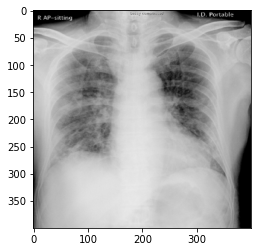

In [22]:
import numpy as np
import cv2
from keras.preprocessing import image
xtest_image = image.load_img('C:/Users/Archangel/Jupyter Notebooks/Datasets/Chest X-Ray/Prediction/ryct.2020200034.fig5-day7.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict(xtest_image)
imggg = cv2.imread('C:/Users/Archangel/Jupyter Notebooks/Datasets/Chest X-Ray/Prediction/ryct.2020200034.fig5-day7.jpeg')
print("Gambar XRAY Positif COVID")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
if results[0][0] == 0:
    prediction = 'Positif Covid-19'
else:
    prediction = 'Negatif Covid-19'
print("Prediksi : ",prediction)

Gambar XRAY Negatif COVID
Prediksi :  Negatif Covid-19


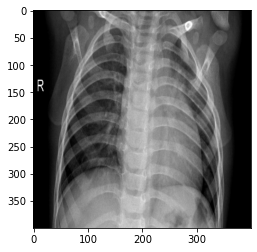

In [23]:
import numpy as np
import cv2
from keras.preprocessing import image
xtest_image = image.load_img('C:/Users/Archangel/Jupyter Notebooks/Datasets/Chest X-Ray/Prediction/NORMAL2-IM-0338-0001.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict(xtest_image)
imggg = cv2.imread('C:/Users/Archangel/Jupyter Notebooks/Datasets/Chest X-Ray/Prediction/NORMAL2-IM-0338-0001.jpeg')
print("Gambar XRAY Negatif COVID")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
if results[0][0] == 0:
    prediction = 'Positif Covid-19'
else:
    prediction = 'Negatif Covid-19'
print("Prediksi : ",prediction)